In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df= pd.read_excel('dfdemocleaned.xlsx', index_col= 0)

Rearrange order of columns -put asdage with other demographic    
Sweden does the best and Egypt does the worst. 
**I want to get back all the asbg10 ones - they are useful** 
## I can use the differing demographic data to see if there is that affects experience in schools and reading scores. 
Should also compare reading scores with the benchmark and can also compare with previous years.
If I get data from different dates maybe I can practice the time/date stuff. change asbh02a to immigrant/ non - immigrant

In [2]:
freq_table = (df['avgscore'].value_counts(normalize = True, bins=10)*100).sort_index()
freq_table

(83.868, 151.789]      0.333252
(151.789, 219.036]     2.212693
(219.036, 286.283]     5.699583
(286.283, 353.53]      9.095810
(353.53, 420.777]     14.018623
(420.777, 488.024]    20.651801
(488.024, 555.271]    24.800294
(555.271, 622.517]    18.497917
(622.517, 689.764]     4.471943
(689.764, 757.011]     0.218084
Name: avgscore, dtype: float64

## Demographic stuff

In [3]:
demographic_info_columns = ['Country', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03','MINAGEARRIVAL', 'rounded_ages','ASDAGE','avgscore']

In [4]:
df_demo = df[demographic_info_columns]

In [5]:
correlation_matrix = df_demo.corr()

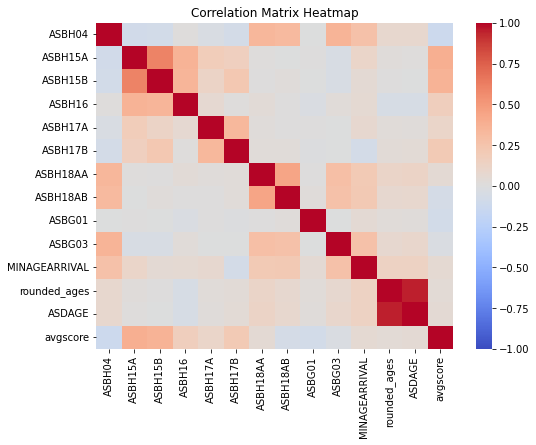

In [6]:
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

`ASBH02A	GEN\CHILD BORN IN <COUNTRY>\
ASBH02B	GEN\AGE OF CHILD WHEN CAME TO <COUNTRY>\
ASBH03A	GEN\LANGUAGE<LANGUAGE OF TEST>\
ASBH04	GEN\HOW OFTEN <LANG OF TEST> AT HOME\
ASBH15A	GEN\LVL OF EDUCATIONGUARDIAN A\
ASBH15B	GEN\LVL OF EDUCATIONGUARDIAN B\
ASBH16	GEN\LVL OF EDUCATIONCHILD\
ASBH17A	GEN\WHAT KIND OF MAIN JOB\GUARDIAN A\
ASBH17B	GEN\WHAT KIND OF MAIN JOB\GUARDIAN B\
ASBH18AA	GEN\LANGUAGE SPOKEN<LANGUAGE OF TEST>GUARDIAN A\
ASBH18AB	GEN\LANGUAGE SPOKEN<LANGUAGE OF TEST>GUARDIAN B\
ASBH18BA	GEN\LANGUAGE SPOKEN<COUNTRY-SPECIFIC>GUARDIAN A\
ASBH18BB	GEN\LANGUAGE SPOKEN<COUNTRY-SPECIFIC>GUARDIAN B`

With the above I just want to focus on the bottom row really - remove the rest? There is a light negative correlation between speaking the language of test at home and the average score. Also those whose parents have more education have performed better overall. However, we can only use numerical columns for a correlation matrix. For non-numerical columns we can try the methods below.

## The below is for comparing columns that are non-numeric. It might be worthwhile to hot-code!? these columns so that we can do .corr with them. Like the ones above. I also want to look at the ones above in more detail.

In [7]:
from scipy.stats import chi2_contingency

In [8]:
# Create a contingency table
contingency_table = pd.crosstab(df['ASBH02A'], df['avgscore'])

In [9]:
# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [11]:
print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Test Statistic: 40810.0
P-value: 0.4962762612667486


The Chi-Square Test of Independence is a statistical test used to determine whether there is a significant association between two categorical variables. The results you provided include two key pieces of information: the Chi-Square Test Statistic and the P-value. Here's what each means:

Chi-Square Test Statistic
Chi-Square Test Statistic: 41365.00000000001
The Chi-Square Test Statistic is a measure of how much the observed frequencies in the contingency table deviate from the expected frequencies (the frequencies we would expect if there were no association between the variables).

A large Chi-Square Test Statistic indicates a large deviation from the expected frequencies, suggesting that there is an association between the variables.
Conversely, a small Chi-Square Test Statistic indicates that the observed frequencies are close to the expected frequencies, suggesting no association between the variables.
P-value
P-value: 0.49630132644040176
The P-value is the probability of obtaining a test statistic at least as extreme as the one observed, assuming that the null hypothesis (no association between the variables) is true.

A small P-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, suggesting that there is a significant association between the variables.
A large P-value (> 0.05) indicates weak evidence against the null hypothesis, suggesting that there is no significant association between the variables.
Interpretation
Chi-Square Test Statistic: 41365.00000000001
P-value: 0.49630132644040176
The P-value of approximately 0.496 suggests that there is a 49.6% chance of obtaining a Chi-Square Test Statistic of 41365 or higher under the assumption that the null hypothesis is true (i.e., there is no association between the variables). Since this P-value is much larger than 0.05, we do not have enough evidence to reject the null hypothesis.

Conclusion
There is no significant association between the variables in the contingency table. The high Chi-Square Test Statistic value seems unusual given the high P-value, which suggests that there might be an issue with the data or the way the test was performed. It might be useful to recheck the data or the contingency table to ensure there are no errors or anomalies.

Let's see how this works with multiple columns.

## Filtering the data 

In [12]:
df['avgscore'].describe()

count    40810.000000
mean       465.178475
std        112.006988
min         84.541739
25%        394.059998
50%        482.122968
75%        550.351523
max        757.011431
Name: avgscore, dtype: float64

So our max is 757.011431 and our min is 84.541739. I'm wondering if some of these are anomalies and we therefore want to delete rows with values under and over a certain amount.

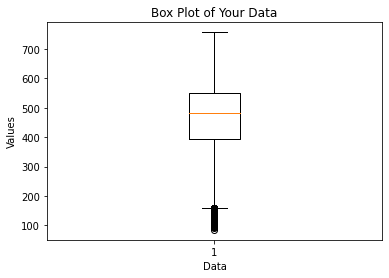

In [13]:
# Create a box plot
plt.boxplot(df['avgscore'])

# Add title and labels
plt.title('Box Plot of Your Data')
plt.xlabel('Data')
plt.ylabel('Values')

# Show the plot
plt.show()

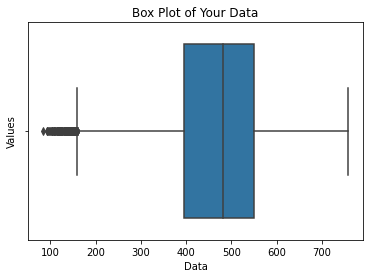

In [14]:
# Create a box plot
sns.boxplot(x=df['avgscore'])

# Add title and labels
plt.title('Box Plot of Your Data')
plt.xlabel('Data')
plt.ylabel('Values')

# Show the plot
plt.show()

Interpretation
Central Box: Represents the interquartile range (IQR), containing the middle 50% of the data.
Line inside the Box: Indicates the median of the data.
Whiskers: Extend to the smallest and largest values within 1.5 * IQR from the lower and upper quartiles.
Dots outside the Whiskers: Represent potential outliers.


In [15]:
# Method 1: Z-score method
from scipy.stats import zscore

# Calculate the Z-scores
df['zscore'] = zscore(df['avgscore'])

# Define a threshold (e.g., 3)
threshold = 3

# Filter the data to remove outliers
df_zscore_filtered = df[(df['zscore'] < threshold) & (df['zscore'] > -threshold)]

In [16]:
df.shape

(40810, 19)

In [17]:
df_zscore_filtered.shape

(40767, 19)

In [18]:
# Method 2: IQR method
Q1 = df['avgscore'].quantile(0.25)
Q3 = df['avgscore'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
df_iqr_filtered = df[(df['avgscore'] >= lower_bound) & (df['avgscore'] <= upper_bound)]

In [19]:
df_iqr_filtered.shape

(40618, 19)

In [20]:
summary_original = df['avgscore'].describe()
summary_zscore_filtered = df_zscore_filtered['avgscore'].describe()
summary_iqr_filtered = df_iqr_filtered['avgscore'].describe()

In [21]:
print("Original Data Summary:")
print(summary_original)
print("\nZ-score Filtered Data Summary:")
print(summary_zscore_filtered)
print("\nIQR Filtered Data Summary:")
print(summary_iqr_filtered)

Original Data Summary:
count    40810.000000
mean       465.178475
std        112.006988
min         84.541739
25%        394.059998
50%        482.122968
75%        550.351523
max        757.011431
Name: avgscore, dtype: float64

Z-score Filtered Data Summary:
count    40767.000000
mean       465.550448
std        111.478071
min        129.197652
25%        394.474030
50%        482.268270
75%        550.425705
max        757.011431
Name: avgscore, dtype: float64

IQR Filtered Data Summary:
count    40618.000000
mean       466.717977
std        109.998741
min        159.634354
25%        395.641192
50%        482.801556
75%        550.640130
max        757.011431
Name: avgscore, dtype: float64


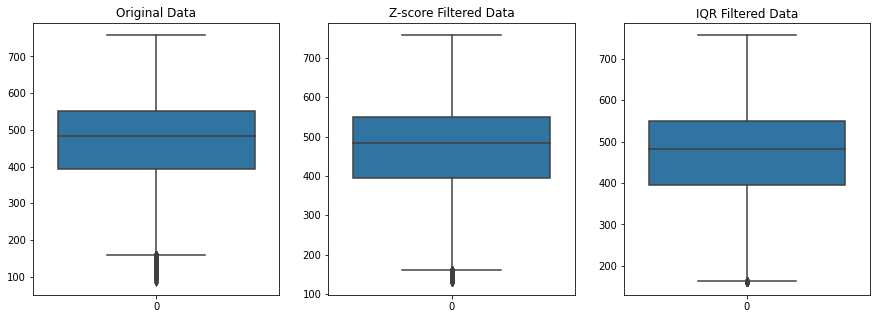

In [22]:
# Visualize distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(df['avgscore'])
plt.title('Original Data')

plt.subplot(1, 3, 2)
sns.boxplot(df_zscore_filtered['avgscore'])
plt.title('Z-score Filtered Data')

plt.subplot(1, 3, 3)
sns.boxplot(df_iqr_filtered['avgscore'])
plt.title('IQR Filtered Data')

plt.show()

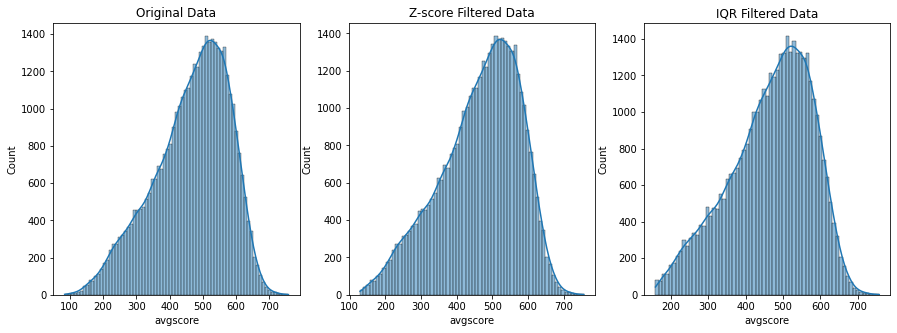

In [23]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['avgscore'], kde=True)
plt.title('Original Data')

plt.subplot(1, 3, 2)
sns.histplot(df_zscore_filtered['avgscore'], kde=True)
plt.title('Z-score Filtered Data')

plt.subplot(1, 3, 3)
sns.histplot(df_iqr_filtered['avgscore'], kde=True)
plt.title('IQR Filtered Data')

plt.show()

Analysis and Comparison
Summary Statistics: Compare the mean, median, standard deviation, and other statistics to see how each method affects the central tendency and spread of the data.
Visual Inspection: Use box plots to visually inspect the data distribution and outliers in each dataset. Use histograms to compare the frequency distributions.
Impact on Analysis: Perform key analyses (e.g., regression, clustering) on both filtered datasets and compare the results to understand the impact of outlier removal.
Documenting Findings
Descriptive Statistics: Summarize how the descriptive statistics differ across the datasets.
Visual Differences: Highlight any noticeable differences in the box plots and histograms.
Analytical Impact: Discuss how outlier removal affects your main analysis, noting any significant changes in results or interpretations.
By comparing the filtered datasets, you can determine which method of outlier removal is more appropriate for your data and analysis goals, providing a deeper understanding of the impact of outliers on your analysis.

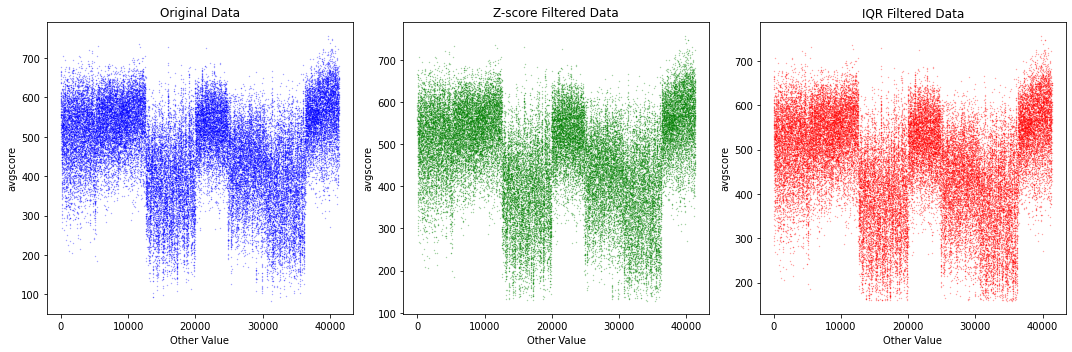

In [24]:
# Scatter plot comparisons
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df.index, df['avgscore'],color='blue', alpha=0.5, s=0.1)
plt.title('Original Data')
plt.ylabel('avgscore')
plt.xlabel('Other Value')

plt.subplot(1, 3, 2)
plt.scatter(df_zscore_filtered.index, df_zscore_filtered['avgscore'], color='green', alpha=0.5, s=0.1)
plt.title('Z-score Filtered Data')
plt.ylabel('avgscore')
plt.xlabel('Other Value')

plt.subplot(1, 3, 3)
plt.scatter(df_iqr_filtered.index, df_iqr_filtered['avgscore'], color='red', alpha=0.5, s=0.1)
plt.title('IQR Filtered Data')
plt.ylabel('avgscore')
plt.xlabel('Other Value')

plt.tight_layout()
plt.show()


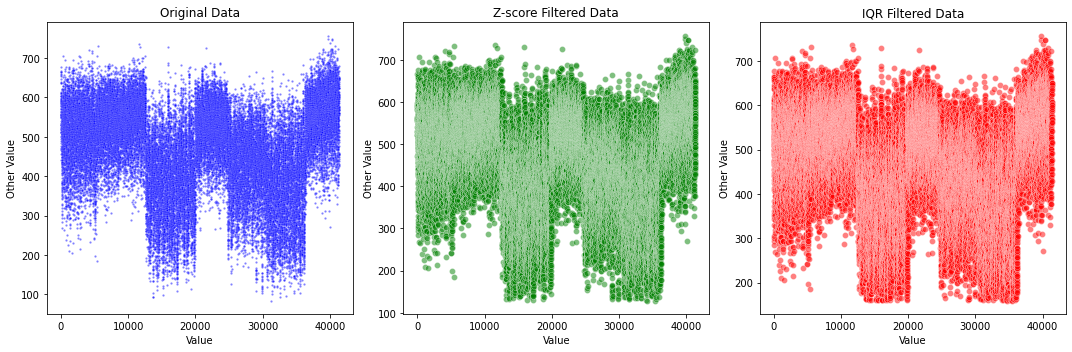

In [25]:
# Scatter plot comparisons
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=df.index, y=df['avgscore'], color='blue', alpha=0.5, s=5)
plt.title('Original Data')
plt.xlabel('Value')
plt.ylabel('Other Value')

plt.subplot(1, 3, 2)
sns.scatterplot(x=df_zscore_filtered.index, y=df_zscore_filtered['avgscore'], color='green', alpha=0.5)
plt.title('Z-score Filtered Data')
plt.xlabel('Value')
plt.ylabel('Other Value')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df_iqr_filtered.index, y=df_iqr_filtered['avgscore'], color='red', alpha=0.5)
plt.title('IQR Filtered Data')
plt.xlabel('Value')
plt.ylabel('Other Value')

plt.tight_layout()
plt.show()


## Let's do a zoomed in scatter for the 700+ scores and the 100- scores

In [26]:
df_200 = df[df['avgscore']<200]

Text(0.5, 0, 'Other Value')

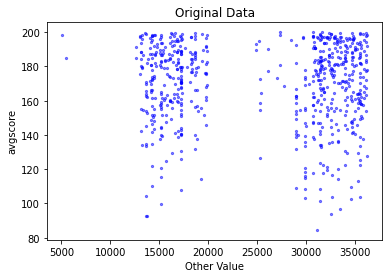

In [27]:
plt.scatter(df_200.index, df_200['avgscore'],color='blue', alpha=0.5, s=5)
plt.title('Original Data')
plt.ylabel('avgscore')
plt.xlabel('Other Value')

In [28]:
df_zscore_filtered = df_zscore_filtered[df_zscore_filtered['avgscore']<200]

Text(0.5, 0, 'Other Value')

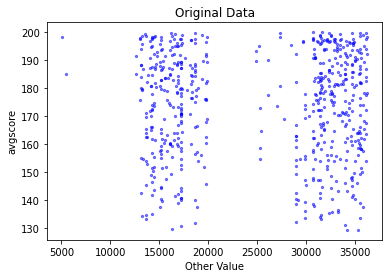

In [29]:
plt.scatter(df_zscore_filtered.index, df_zscore_filtered['avgscore'],color='blue', alpha=0.5, s=5)
plt.title('Original Data')
plt.ylabel('avgscore')
plt.xlabel('Other Value')

We can plot the above on the same grid for analysis.

I think my data is normally distributed because there is an obvious dip for specific countries but there are no crazy dips or heights that are not normal for the country. 

## Hexbin and lagplot below

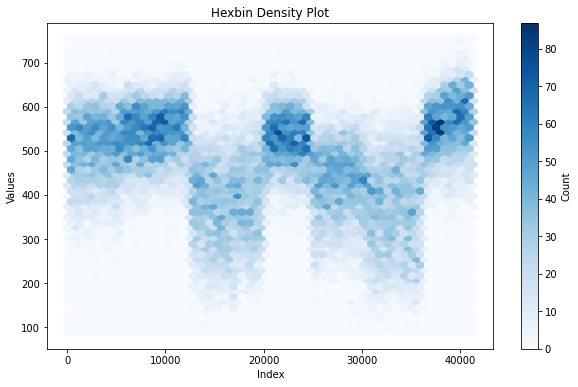

In [30]:
plt.figure(figsize=(10, 6))
plt.hexbin(df.index, df['avgscore'], gridsize=50, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Hexbin Density Plot')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

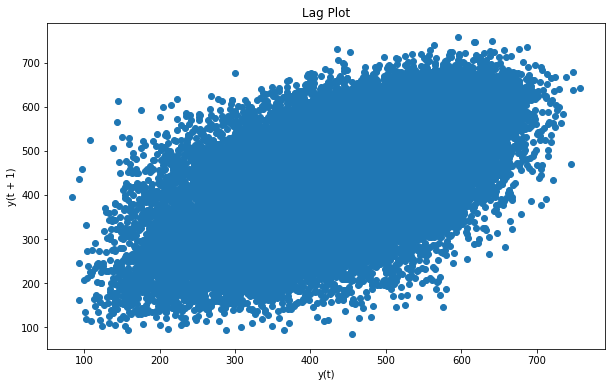

In [31]:
from pandas.plotting import lag_plot

plt.figure(figsize=(10, 6))
lag_plot(df['avgscore'])
plt.title('Lag Plot')
plt.show()